[2024-11-08 Fiddler](https://thefiddler.substack.com/p/where-will-the-sorting-hat-put-you)
====================

Fiddler
-------
It wasn't stated, but I'll assume that the hat will grant a student's request if it doesn't
violate having two students in a row in the same house.

If the probability that the $n$th student goes to Graphindor is $G(n)$, then $G(n+1) = (1-G(n))/3$,
and $G(1) = 1$.  My probability is $1 - G(9)$.

In [1]:
maxima('load("solve_rec")')
G(n) = maxima('solve_rec(G(n+1) = (1-G(n))/3, G(n), G(1) = 1)').rhs()
p = 1-G(9)
(p,numerical_approx(p))

(1640/2187, 0.749885688157293)

I note that
$G(n)$ approaches $1/4$ as $n$ gets large, and $G(n) < 1/4$ when $n$ is even and $G(n) > 1/4$ when $n$ is odd.

Extra credit
------------
My probability as a function of $N$ is

In [2]:
P(N) = sum((1-G(n))/(N-1), n, 1, N-1)
show(P)

N |--> 1/4*sum((3^(n + 1) + 9*(-1)^n)/3^n, n, 1, N - 1)/(N - 1)

I expect $P(N)$ to approach $3/4$ as $N$ gets large, and $p$ is close to, but slightly less
than, $3/4$.  Graphing it

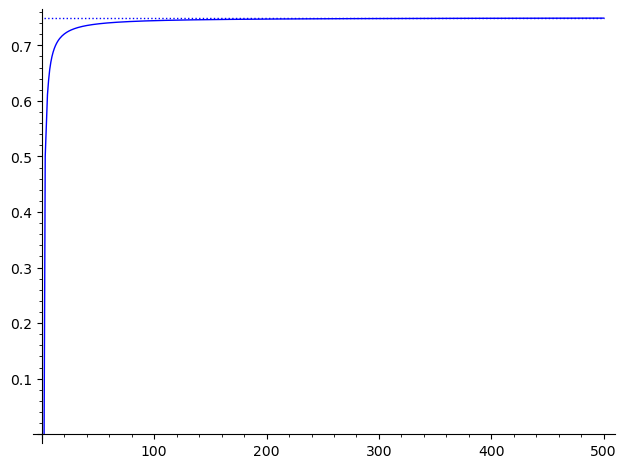

In [3]:
plot(p, x, 2, 500, linestyle='dotted') + line([(n,numerical_approx(P(n))) for n in [2..500]])

Brute forcing it seems like a slow possibility, but there's also a recurrence
relation for $P(N)$,

$$ P(N+1) = \frac{(N-1)P(N)}{N} + \frac{3(1-(-3)^{1-N})}{4N} $$

In [4]:
P_r(N,P_N) = (N-1)*P_N/N + 3*(1-(-3)^(1-N))/(4*N)
[(P(n+1) - P_r(n,P(n))).simplify() for n in [2..10]]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

The solution to the recurrence relation doesn't help, since it
is still $O(N)$.

In [5]:
show(maxima('solve_rec(P(N+1) = (N-1)*P(N)/N + 3*(1-(-3)^(1-N))/(4*N), P(N), P(2) = 0)'))

P(N) = ('sum(%j*((-3)^(2-%j)/(4*%j)+3/(4*%j)),%j,2,N-1))/(N-1)

But, using the recurrence relation means a brute-force search is $O(N)$ rather than
$O(N^2)$.

In [6]:
pp = 0
n = 2
while pp <= p:
    pp = P_r(n,pp)
    n += 1
print((n,numerical_approx(pp-p),pp))

(4922, 5.80734823749768e-9, 336124678185690365750998038693150734094837873641387964570194252169264891736818299924275204161228780842886139817345182876082808907949361253646126981388237746876239528326895595428769467778335335513241413620791490938210939957105653069760789140785884556469831763929966704638352011759908879508361802453892930463138791072790541278615424873555057712553739509838294034953344941601480911744657854041715194066793834457455219727695350279783312532620097113551875298080090944054648813236492369119034130239045236944661855103086515389820082226730114484596252923039470445453891314221604591290501589708852504455825054661249541343495791950157500932829730899722389757441124298885046941283005129725207842445178957243277919117846913953914629346360427867383456673860810573261985308536041848311114477295351224269949361885136159225325360166638875502388781860423706438135895583409192357796194865204278429772430427544566860821489745140389340632326174087128895591393157525123994882369444715222232405

Graphing $3/4-P(N)$ on a log scale shows more clearly where $P(N)$ becomes greater than $p$.

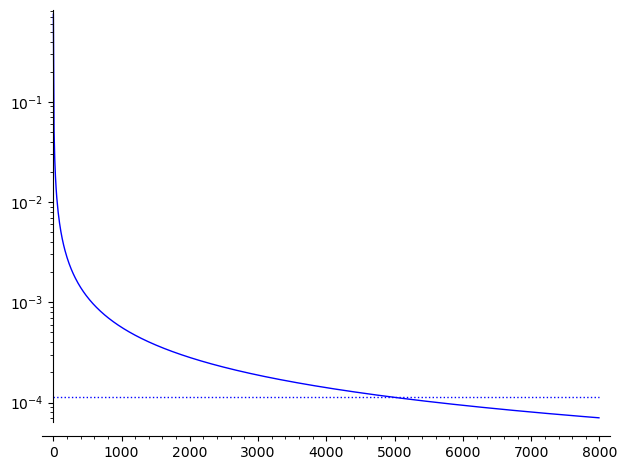

In [7]:
pp = 0
n = 2
points = [(2,3/4)]
while n < 8000:
    pp = P_r(n,pp)
    n += 1
    if mod(n,10) == 2:
        points = points + [(n,numerical_approx(3/4-pp))]
plot(3/4-p, x, 2, 8000, linestyle='dotted', scale='semilogy') + line(points)

Zooming in on where $P(N)$ becomes greater than $p$:

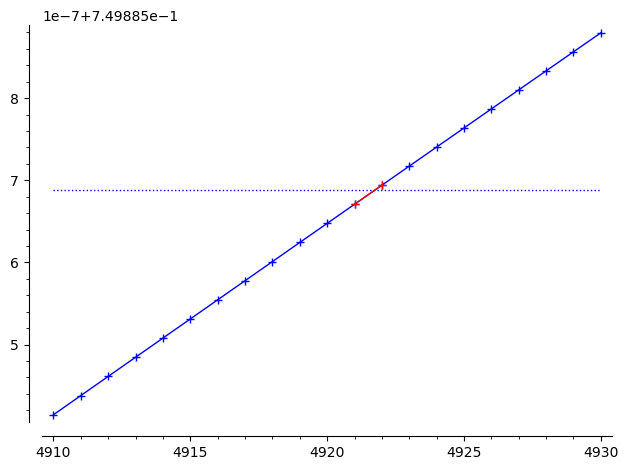

In [8]:
pp = 0
n = 2
points = []
points2 = []
while n < 4930:
    pp = P_r(n,pp)
    n += 1
    if n >= 4910:
        points += [(n,numerical_approx(pp))]
    if n == 4921 or n == 4922:
        points2 += [(n,numerical_approx(pp))]
plot(p, x, 4910, 4930, linestyle='dotted') + line(points, marker='+') + line(points2, color='red', marker='+')

[Simulations](20241108.go) roughly agree, but the differences are so small that it would
be way too expensive to run enough trials to resolve the answer.

    $ go run 20241108.go
    2 0.000000 0.000000
    3 1.000000 1.000000
    4 0.666516 0.666667
    5 0.777972 0.777778
    6 0.740699 0.740741
    7 0.752979 0.753086
    8 0.748882 0.748971
    9 0.750329 0.750343
    10 0.749956 0.749886
    11 0.750041 0.750038
    2 0.000000 0.000000 0.749886
    3 0.500398 0.500000 0.749886
    4 0.555650 0.555556 0.749886
    5 0.612178 0.611111 0.749886
    6 0.636007 0.637037 0.749886
    4921 0.749047 0.749886 0.749886
    4922 0.749008 0.749886 0.749886

Making the rounds
-----------------

Looking at the spoiler, the answer is

In [9]:
C = var('C')
f(x) = C*sin(pi*x)
show(integral(derivative(f(x),x)^2,x,0,1)/integral(f(x)^2,x,0,1))

pi^2

I'm guessing that proving that this is the answer involves considering the Fourier series
of a function and showing that adding any harmonic other than the fundamental pulls the
ratio towards a value greater than $\pi^2$.

Let $f(x) = \sum_{n=1}^\infty C_n\sin(n\pi x)$ and

$$\begin{aligned}
    N &= \int_0^1 f'(x)^2 dx = \sum_{n=1}^\infty \frac{n^2\pi^2C_n^2}2 \\
    D &= \int_0^1 f(x)^2 dx  = \sum_{n=1}^\infty \frac{C_n^2}2 \\
\end{aligned}$$

and the ratio is $R = N/D$.

Consider $f(x) + \epsilon\sin(m\pi x)$, where $\epsilon$ is small.  Then,

$$\begin{aligned}
    \int_0^1 (f'(x)+\epsilon m\pi\cos(m\pi x))^2 dx &= N + C_mm^2\pi^2\epsilon + \frac{m^2\pi^2\epsilon^2}{2} \\
    \int_0^1 (f(x)+\epsilon\sin(m\pi x))^2 dx &= D + C_m\epsilon + \frac{\epsilon^2}{2} \\
\end{aligned}$$

and the ratio, to $O(\epsilon)$, is

In [10]:
epsilon,N,D,R,m,C_m = var('epsilon,N,D,R,m,C_m')

R1 = taylor((N+C_m*m^2*pi^2*epsilon+m^2*pi^2*epsilon^2/2)/(D+C_m*epsilon + epsilon^2/2),epsilon,0,1)
show(R1.substitute(N == R*D))

R + (pi^2*C_m*D*m^2 - C_m*D*R)*epsilon/D^2

So when $C_m$ and $\epsilon$ have the same sign, this pushes the ratio towards $m^2\pi^2$.

And when $C_m = 0$, the ratio, to $O(\epsilon^2)$, is

In [11]:
R2 = taylor((N+C_m*m^2*pi^2*epsilon+m^2*pi^2*epsilon^2/2)/(D+C_m*epsilon + epsilon^2/2),epsilon,0,2)
show(R2(C_m=0).substitute(N == R*D))

R + 1/2*(pi^2*D^2*m^2 - D^2*R)*epsilon^2/D^3

So this also pushes the ratio towards $m^2\pi^2$.

Any $f(x)$ can be constructed by starting with $C_n\sin(n\pi x)$, where the ratio is $n^2\pi^2$, and $n$
is the smallest $n$ for which $C_n \ne 0$.  Then, adding the higher harmonics always pushes the ratio
towards a value greater than $n^2\pi^2$.  Since the minimum $n$ is $n=1$, the minimum ratio is $\pi^2$.

### A simpler proof
The ratio

$$ R = \frac{\sum_{n=1}^\infty n^2\pi^2C_n^2}{\sum_{n=1}^\infty C_n^2} $$

is the weighted average value of $n^2\pi^2$, where $C_n^2$ are the weights, so the minimum is when
100% of the weight is at $n=1$.